# Electrical characteristic analysis of sample CA12X_C5

In [54]:
paths = ['../CA12X_C5/CA12X_C5_current_from_1e-4_to_10e-4A/CA12X_C5_current_from_1e-4_to_10e-4A-20220408130234',
        '../CA12X_C5/CA12X_C5_current_from_1e-4_to_10e-4A/CA12X_C5_current_from_1e-4_to_10e-4A-20220408145214',
        '../CA12X_C5/CA12X_C5_current_from_1e-6_to_10e-6A/CA12X_C5_current_from_1e-6_to_10e-6A-20220408165631']

# Select the experiment from list of the paths, eg. paths[0] picks the first experiment, paths[1] the second one and so on 
data_path = paths[2]

with open(data_path, "r", encoding='utf-8') as file_desc:
    text = file_desc.read()
    print(text)

Electrical characterization experiment of current biased Ca2RuO4 crystal along C-axis as a function of temperature with 2-wire connection. Two conductive pads are created by sputtering Ag on both side of the sample.
Name of the sample: CA12X_C5
Area: 2.588e-2cm2
Length: 0.153e-1cm
Current source from 1e-6A to 10e-6A

### Experiment 20220408165631 ###
Date 2022-04-08 start at 15:41:38 end at 16:55:55 duration 1:14:17
Temperature range from 122.64°K to 76.82°K
Resistivity:
	 average 1.4695e+07𝛀 cm
	 minimum 9.5740e+06𝛀 cm at 122.17°K
	 maximum 1.9856e+07𝛀 cm at 122.64°K
Voltage:
	 average 4.7442e+01V
	 minimum 6.9066e+00V at 119.41°K
	 maximum 9.7874e+01V at 76.82°K


<img style="float:left" src="../CA12X_C5/CA12X_C5_Info/Ca_12x_C5_1.jpg" width=300 />
<img src="../CA12X_C5/CA12X_C5_Info/ca12xc5_20220407_150752_montaggio_campione.jpg" width=300 />

## Diffrattogramma

<img src="../CA12X_C5/CA12X_C5_Info/CA12X_C5.jpg" />

## Annotation

Dall'analisi dello spettro a raggi X non è evidente la presenza di inclusioni di rutenio metallico in maniera significativa; è presente una fase Ca113 Per il collegamento elettrico sono state create due piazzole conduttive depositando su entrambe le facce Ag con il metodo della polverizzazione catodica, in atmosfera con Argon per la durata di 4 minuti e 30 secondi, alla pressione di lavoro di 8 10-2 torr e il voltaggio di 1,9kV. Per delineare le piazzole è stato usato un foglio di paraffina, PARAFILM. Durante la rimozione del film di paraffina si è staccato un piccolo pezzo dal campione. La resistenza iniziale misurata a temperatura ambiente è di circa 235 Ohm. Il giorno 12/04/2022 il campione è stato smontato dal discendente per rifare i contatti, al montaggio la resistenza misurata a temperatura ambiente è di circa 220 Ohm

## Loading experiment data

In [55]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal
from datetime import datetime

plt.rcParams['figure.figsize'] = [20, 6]

In [56]:
data = np.load(data_path + '.npz', allow_pickle=True)
datetime_data = data['datetime']
voltage_data = data['voltage']
resistance_data = data['resistance']
temperature_data = data['temperature']
source_data = data['current_source']
c_density_data = data['current_density']
e_field_data = data['electric_field']
resistivity_data = data['resistivity']
thickness = voltage_data/e_field_data
area = source_data/c_density_data
# Density in mA/cm2
c_density_data = c_density_data * 1000

### Data description

- DT datetime
- V voltage measurements in Volts
- R resistance measurements in Ohm
- T temperature measurements in °K
- I current source in Amps
- J current density in mA/cm^2
- E electric field in V/cm
- RHO resistivity in Ohm cm

In [57]:
print(f"Area {area[0]:.4e}cm2\nThickness:{thickness[0]:.4e}cm")

Area 2.5880e-02cm2
Thickness:1.5300e-02cm


### Temperature

In [58]:
temp_msg = ""
temp_const = True
diff = np.max(temperature_data) - np.min(temperature_data)
if diff <= 0.1: 
    temp_msg = f"Temperature is constant: {temperature_data[0]:.2f}°K"   
elif diff <= 1.5: 
    temp_msg = f"Temperature is quite constant, average value: {np.average(temperature_data):.2f}°K difference between min and max {np.max(temperature_data) - np.min(temperature_data):.2f}°K"
else:
    temp_msg = f"Temperature span from {np.min(temperature_data):.2f}°K to {np.max(temperature_data):.2f}°K"
    temp_const = False
print(temp_msg)

Temperature span from 76.82°K to 122.64°K


### Input source

In [59]:
source_msg = ""
source_const = True
if np.max(source_data) == np.min(source_data): 
    source_msg = f"Source is constant: {source_data[0]:.2e}A ({c_density_data[0]:.2e}mA/cm2)"
else:
    source_msg = f"Source span from {np.min(source_data):.2e}A ({np.min(c_density_data):.2e}mA/cm2) to {np.max(source_data):.2e}A ({np.max(c_density_data):.2e}mA/cm2)"
    source_const = False
print(source_msg)

Source span from 1.00e-06A (3.86e-02mA/cm2) to 1.00e-05A (3.86e-01mA/cm2)


In [60]:
DT = datetime_data[0:-1]
T = temperature_data[0:-1]
J = c_density_data[0:-1]
RHO = resistivity_data[0:-1]
E = e_field_data[0:-1]

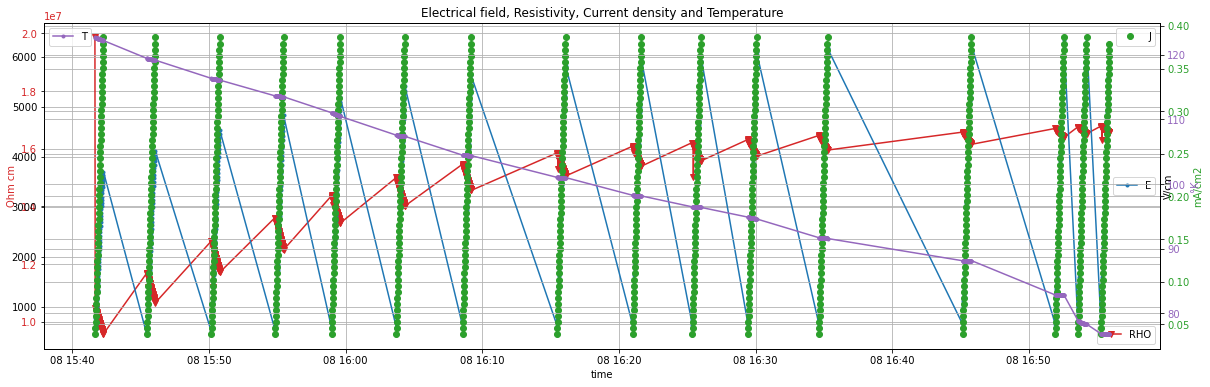

In [61]:
fig, ax1 = plt.subplots()
ax1.set_title("Electrical field, Resistivity, Current density and Temperature")
ax1.set_xlabel('time')
ax1.set_ylabel('Ohm cm', color='C3')
ax1.tick_params(axis='y', labelcolor='C3')
ax1.plot(DT, RHO, 'v-', color='C3', label='RHO')
ax2 = ax1.twinx()
ax2.set_ylabel('V/cm')
ax2.plot(DT, E, '.-', label='E')
ax1.legend(loc='upper right')
ax2.legend(loc='upper left')
ax3 = ax1.twinx()
ax4 = ax2.twinx()
if not temp_const:
    ax4.set_ylabel('°K', color='C4')
    ax4.tick_params(axis='y', labelcolor='C4')
    ax4.plot(DT, T, '.-', label='T', color='C4')
    ax4.legend(loc='upper left')

if not source_const:
    ax3.set_ylabel('mA/cm2', color='C2')
    ax3.tick_params(axis='y', labelcolor='C2')
    ax3.plot(DT, J, 'o', label='J', color='C2')
    ax3.legend(loc='upper right')

ax1.legend(loc='lower right')
ax2.legend(loc='right')
ax1.grid(True)
ax2.grid(True)
ax3.grid(True)
ax4.grid(True)

## Slices

In [62]:
slices, = np.where(source_data == np.min(source_data))
for i in range(0,len(slices)-1):
    print(f"Slice {i+1} from {slices[i]} to {slices[i+1]}")
print(f"Slice {len(slices)} from {slices[-1]} to {len(source_data)}")

Slice 1 from 0 to 50
Slice 2 from 50 to 100
Slice 3 from 100 to 150
Slice 4 from 150 to 200
Slice 5 from 200 to 250
Slice 6 from 250 to 300
Slice 7 from 300 to 350
Slice 8 from 350 to 400
Slice 9 from 400 to 450
Slice 10 from 450 to 500
Slice 11 from 500 to 550
Slice 12 from 550 to 600
Slice 13 from 600 to 650
Slice 14 from 650 to 700
Slice 15 from 700 to 750
Slice 16 from 750 to 800


## Analysis of the 1st slice

In [63]:
DT = datetime_data[slices[0]:slices[1]]
T = temperature_data[slices[0]:slices[1]]
J = c_density_data[slices[0]:slices[1]]
RHO = resistivity_data[slices[0]:slices[1]]
E = e_field_data[slices[0]:slices[1]]

In [64]:
temp_const = True
diff = np.max(T) - np.min(T)
if diff <= 0.1: 
    temp_msg = f"Temperature is constant: {T[0]:.2f}°K"   
elif diff <= 1.5: 
    temp_msg = f"Temperature is quite constant, average value: {np.average(T):.2f}°K difference between min and max {np.max(T) - np.min(T):.2f}°K"
else:
    temp_msg = f"Temperature span from {np.min(T):.2f}°K to {np.max(T):.2f}°K"
    temp_const = False
print(temp_msg)

Temperature is quite constant, average value: 122.39°K difference between min and max 0.47°K


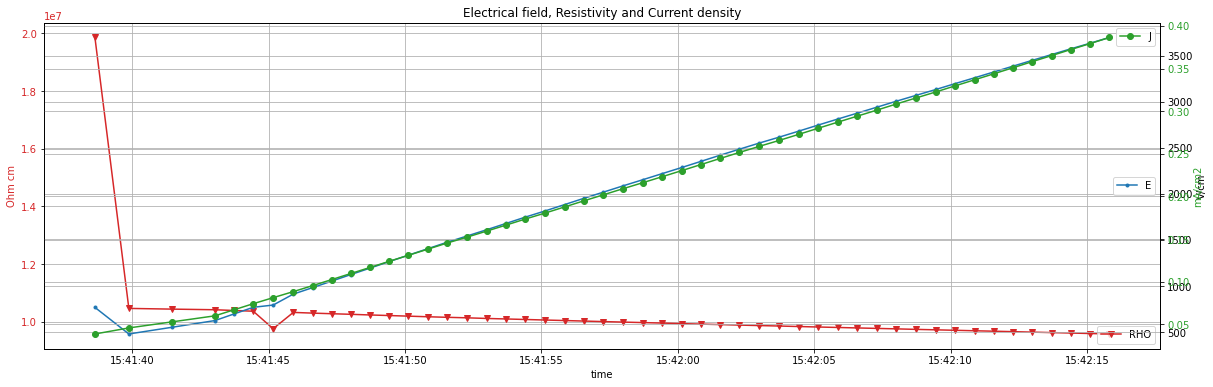

In [65]:
fig, ax1 = plt.subplots()
ax1.set_title("Electrical field, Resistivity and Current density")
ax1.set_xlabel('time')
ax1.set_ylabel('Ohm cm', color='C3')
ax1.tick_params(axis='y', labelcolor='C3')
ax1.plot(DT, RHO, 'v-', color='C3', label='RHO')
ax2 = ax1.twinx()
ax2.set_ylabel('V/cm')
ax2.plot(DT, E, '.-', label='E')
ax1.legend(loc='upper right')
ax2.legend(loc='upper left')
ax3 = ax1.twinx()

if not temp_const:
    ax3.set_ylabel('°K', color='C2')
    ax3.tick_params(axis='y', labelcolor='C2')
    ax3.plot(DT, T, 'o-', label='T', color='C2')
    ax3.legend(loc='upper right')

if not source_const:
    ax3.set_ylabel('mA/cm2', color='C2')
    ax3.tick_params(axis='y', labelcolor='C2')
    ax3.plot(DT, J, 'o-', label='J', color='C2')
    ax3.legend(loc='upper right')

ax1.legend(loc='lower right')
ax2.legend(loc='right')
ax1.grid(True)
ax2.grid(True)
ax3.grid(True)

### Peaks detection

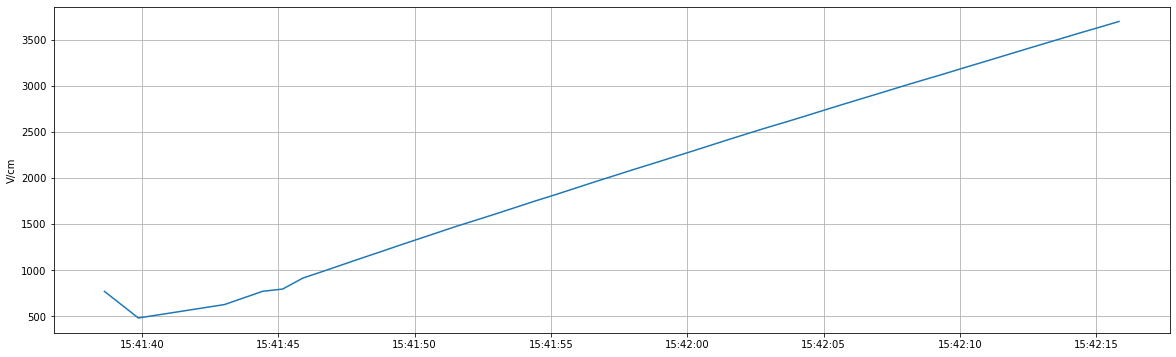

In [66]:
# Individuazione dei picchi
peaks, _ = signal.find_peaks(E, prominence=10)
# Larghezza, Ampiezza base, inizio e fine dei picchi
widths, values, start, end = signal.peak_widths(E, peaks, rel_height=1)
plt.plot(DT, E)
plt.plot(DT[peaks], E[peaks], 'o', c='orange')
istart = np.rint(start)
iend = np.rint(end)
plt.plot(DT[iend.astype(int)], E[iend.astype(int)], 'x')
#plt.hlines(values, DT[istart.astype(int)], DT[iend.astype(int)], color="C3")
plt.ylabel('V/cm')
plt.grid(True)

#### Starting and ending point of the peaks

In [67]:
print(f"First peak with value {E[peaks[0]]:.1f} V/cm, {RHO[peaks[0]]:.3e} Ohm cm at T:{T[peaks[0]]:.2f}°K and J:{J[peaks[0]]:.3e} mA/cm2\
\nLast peak  with value {E[peaks[-1]]:.1f} V/cm, {RHO[peaks[-1]]:.2e} Ohm cm at T:{T[peaks[-1]]:.2f}°K and J:{J[peaks[-1]]:.3e} mA/cm2")

IndexError: index 0 is out of bounds for axis 0 with size 0

#### Peaks amplitude

In [ ]:
plt.plot(DT, E)
plt.vlines(DT[peaks], values, E[peaks], color='red')
plt.ylabel('V/cm')
plt.grid(True)

In [ ]:
diff = E[peaks]-values
print(f"Minimum amplitude {np.min(diff):.1f} V/cm at T:{T[np.argmin(diff)]:.2f}°K and J:{J[np.argmin(diff)]:.3e} mA/cm2\
      \nMaximum amplitude {np.max(diff):.1f} at V/cm at T:{T[np.argmax(diff)]:.2f}°K and J:{J[np.argmax(diff)]:.3e} mA/cm2\
      \nAverage amplitude {np.mean(diff):.1f} V/cm")

## Analysis of the last slice

In [68]:
DT = datetime_data[slices[15]:-1]
T = temperature_data[slices[15]:-1]
J = c_density_data[slices[15]:-1]
RHO = resistivity_data[slices[15]:-1]
E = e_field_data[slices[15]:-1]

In [69]:
temp_const = True
diff = np.max(T) - np.min(T)
if diff <= 0.1: 
    temp_msg = f"Temperature is constant: {T[0]:.2f}°K"   
elif diff <= 1.5: 
    temp_msg = f"Temperature is quite constant, average value: {np.average(T):.2f}°K difference between min and max {np.max(T) - np.min(T):.2f}°K"
else:
    temp_msg = f"Temperature span from {np.min(T):.2f}°K to {np.max(T):.2f}°K"
    temp_const = False
print(temp_msg)

Temperature is constant: 76.82°K


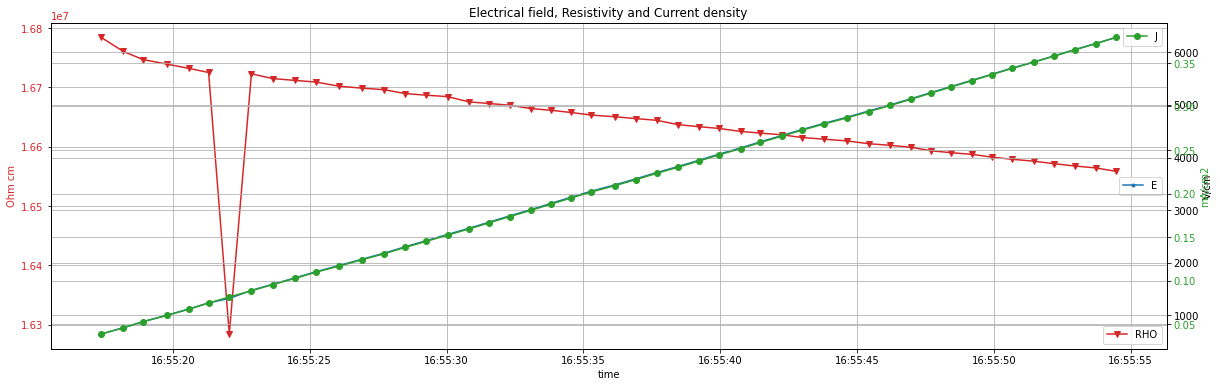

In [72]:
fig, ax1 = plt.subplots()
ax1.set_title("Electrical field, Resistivity and Current density")
ax1.set_xlabel('time')
ax1.set_ylabel('Ohm cm', color='C3')
ax1.tick_params(axis='y', labelcolor='C3')
ax1.plot(DT, RHO, 'v-', color='C3', label='RHO')
ax2 = ax1.twinx()
ax2.set_ylabel('V/cm')
ax2.plot(DT, E, '.-', label='E')
ax1.legend(loc='upper right')
ax2.legend(loc='upper left')
ax3 = ax1.twinx()

if not temp_const:
    ax3.set_ylabel('°K', color='C2')
    ax3.tick_params(axis='y', labelcolor='C2')
    ax3.plot(DT, T, 'o-', label='T', color='C2')
    ax3.legend(loc='upper right')

if not source_const:
    ax3.set_ylabel('mA/cm2', color='C2')
    ax3.tick_params(axis='y', labelcolor='C2')
    ax3.plot(DT, J, 'o-', label='J', color='C2')
    ax3.legend(loc='upper right')

ax1.legend(loc='lower right')
ax2.legend(loc='right')
ax1.grid(True)
ax2.grid(True)
ax3.grid(True)

### Peaks detection

In [ ]:
# Individuazione dei picchi
peaks, _ = signal.find_peaks(E, prominence=10)
# Larghezza, Ampiezza base, inizio e fine dei picchi
widths, values, start, end = signal.peak_widths(E, peaks, rel_height=1)
plt.plot(DT, E)
plt.plot(DT[peaks], E[peaks], 'o', c='orange')
istart = np.rint(start)
iend = np.rint(end)
plt.plot(DT[iend.astype(int)], E[iend.astype(int)], 'x')
#plt.hlines(values, DT[istart.astype(int)], DT[iend.astype(int)], color="C3")
plt.ylabel('V/cm')
plt.grid(True)

#### Starting and ending point of the peaks

In [ ]:
print(f"First peak with value {E[peaks[0]]:.1f} V/cm, {RHO[peaks[0]]:.3e} Ohm cm at T:{T[peaks[0]]:.2f}°K and J:{J[peaks[0]]:.3e} mA/cm2\
\nLast peak  with value {E[peaks[-1]]:.1f} V/cm, {RHO[peaks[-1]]:.2e} Ohm cm at T:{T[peaks[-1]]:.2f}°K and J:{J[peaks[-1]]:.3e} mA/cm2")

#### Peaks amplitude

In [ ]:
plt.plot(DT, E)
plt.vlines(DT[peaks], values, E[peaks], color='red')
plt.ylabel('V/cm')
plt.grid(True)

In [ ]:
diff = E[peaks]-values
print(f"Minimum amplitude {np.min(diff):.1f} V/cm at T:{T[np.argmin(diff)]:.2f}°K and J:{J[np.argmin(diff)]:.3e} mA/cm2\
      \nMaximum amplitude {np.max(diff):.1f} at V/cm at T:{T[np.argmax(diff)]:.2f}°K and J:{J[np.argmax(diff)]:.3e} mA/cm2\
      \nAverage amplitude {np.mean(diff):.1f} V/cm")